In [4]:
pip install jellyfish

For twitter-facebook, better distance metric would be:  Edit Distance
For facebook-instagram, better distance metric would be:  Edit Distance
For instagram-twitter, better distance metric would be:  Edit Distance


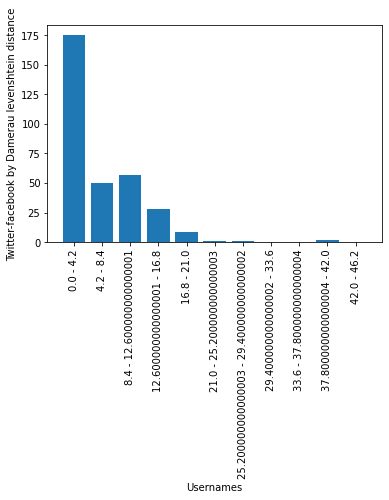

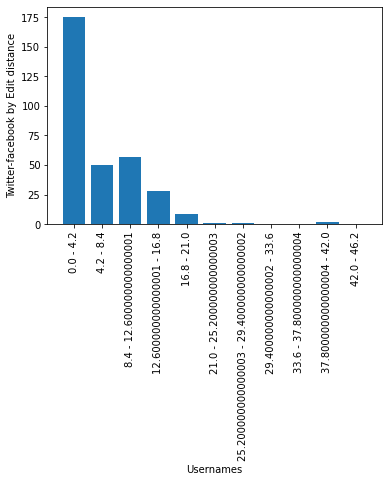

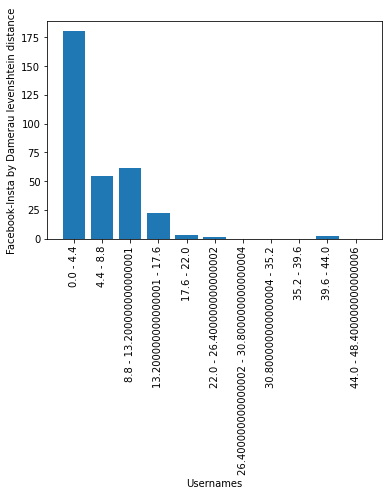

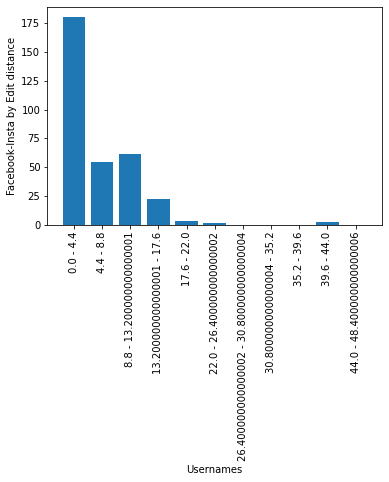

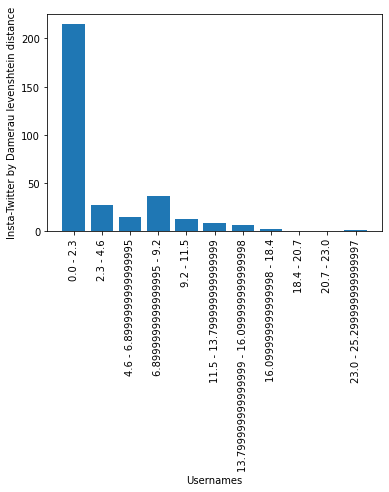

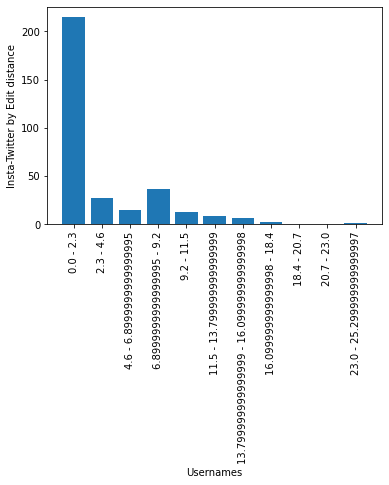

In [5]:

import pandas as pd
from jellyfish import damerau_levenshtein_distance
import nltk
from nltk.metrics import edit_distance
import matplotlib.pyplot as plt


seconddata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IdentityResolution.csv").to_numpy();

userdata=[];
index=0;
for i in seconddata:
  first=i[1].split("com/")[-1];
  second=i[2].split("com/")[-1];
  third=i[3].split("com/")[-1];
  seconddata[index][1]=first;
  seconddata[index][2]=second;
  seconddata[index][3]=third;
  index+=1;
tf=[];fi=[];it=[];
for i in seconddata:
  first=i[1];second=i[2];third=i[3];
  tf1=damerau_levenshtein_distance(first,second);tf2=edit_distance(first,second);l1=[];l1.append(tf1);l1.append(tf2);
  fi1=damerau_levenshtein_distance(second,third);fi2=edit_distance(second,third);l2=[];l2.append(fi1);l2.append(fi2);
  it1=damerau_levenshtein_distance(third,first);it2=edit_distance(third,first);l3=[];l3.append(it1);l3.append(it2);
  tf.append(l1);fi.append(l2);it.append(l3);
def functionchecker(l1):
  count1=0;count2=0;
  for i in l1:
    if(i[0]<i[1]):
      count1+=1;
    else:
      count2+=1;
  if(count1>count2):
    return 0
  else:
    return 1
answer1=0;answer2=0;answer3=0;
if(functionchecker(tf)==0):
  answer1="Damerau Levenshtein Distance"
else:
  answer1="Edit Distance"
if(functionchecker(fi)==0):
  answer2="Damerau Levenshtein Distance"
else:
  answer2="Edit Distance"
if(functionchecker(it)==0):
  answer3="Damerau Levenshtein Distance"
else:
  answer3="Edit Distance"
print("For twitter-facebook, better distance metric would be: ", answer1);
print("For facebook-instagram, better distance metric would be: ", answer2);
print("For instagram-twitter, better distance metric would be: ", answer3);
def plotter(namelist, matriclist, names, index):
  l1=[]
  l2=[];
  counter=0;
  for i in matriclist:
    l1.append(i[index]);l2.append(namelist[counter][0]);
    counter+=1;
  min1=min(l1);max1=max(l1);
  interval=(max1-min1)/10
  freq1=[0]*11;
  for i in matriclist:
    freq1[(int)(i[0]//interval)]+=1
  bucket=[0]*11;
  for i in range(11):
    bucket[i]=str(i*interval)+" - "+str((i+1)*interval);
  plt.bar(bucket, freq1);
  plt.xlabel("Usernames");plt.ylabel(names);
  plt.xticks(rotation=90)
  plt.show();
plotter(seconddata, tf, "Twitter-facebook by Damerau levenshtein distance",0)
plotter(seconddata, tf, "Twitter-facebook by Edit distance",1)
plotter(seconddata, fi, "Facebook-Insta by Damerau levenshtein distance",0)
plotter(seconddata, fi, "Facebook-Insta by Edit distance",1)
plotter(seconddata, it, "Insta-Twitter by Damerau levenshtein distance",0)
plotter(seconddata, it, "Insta-Twitter by Edit distance",1)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')